## **Small project: Simple Linear Regression**

In today's world, health insurance has become an essential aspect of life. It helps people to cope with the rising costs of medical expenses, and provides them with financial protection in case of any unforeseen health-related events. In this project, we aim to build a simple linear regression model to predict the charges of health insurance based on various inputs such as age, sex, BMI, number of children, smoker status, and region.

The main objective of this project is to identify the significant factors that affect health insurance charges and develop a model that can accurately predict the charges based on these factors. We will analyze the relationship between the independent variables (age, sex, BMI, number of children, smoker status, and region) and the dependent variable (health insurance charges) using a simple linear regression model.

This project will help us to gain insights into the factors that contribute to higher insurance charges and to develop a predictive model that can be used by insurance companies to estimate the charges for their clients. It will also help individuals to understand the factors that can affect their insurance charges and make informed decisions about their health insurance needs.

In [109]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression
%matplotlib inline

## **Retrieving the data**

In [5]:
# Import the data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Exploratory Data Analysis**

In [9]:
# Check the shape of the data
df.shape

(1338, 7)

In [10]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# Summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='charges', ylabel='Count'>

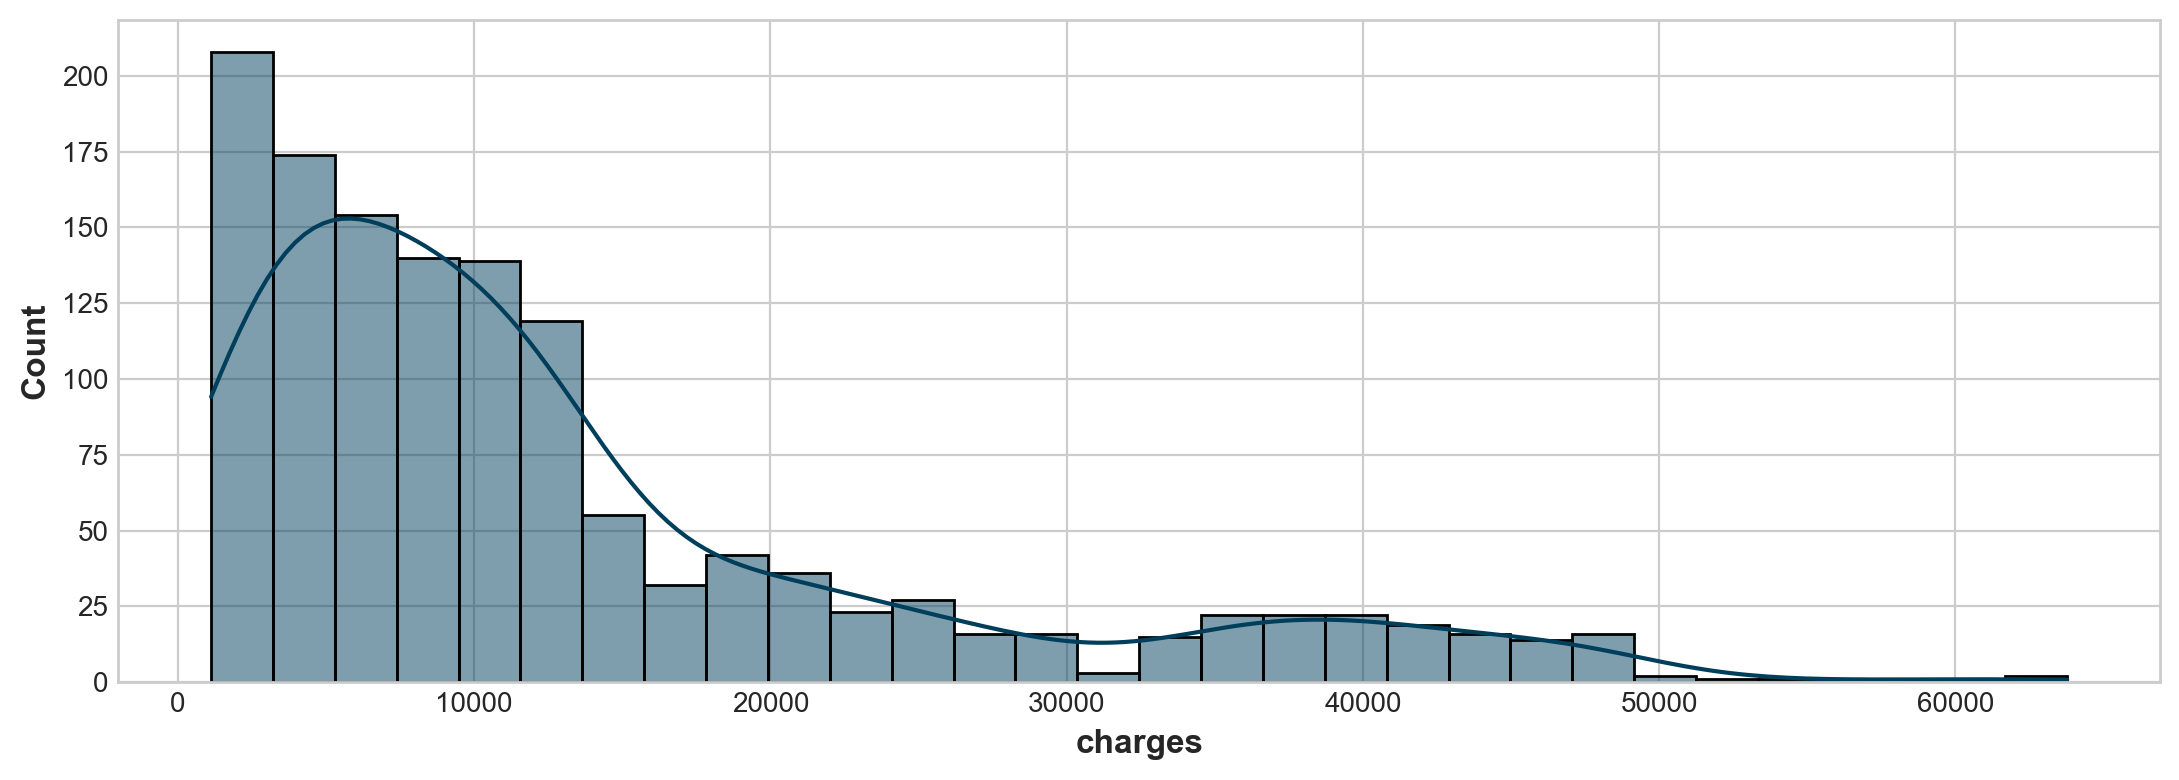

In [38]:
# Create a histogram of the charges
sns.histplot(df['charges'], kde=True, color='#003f5c')

<AxesSubplot:xlabel='charges'>

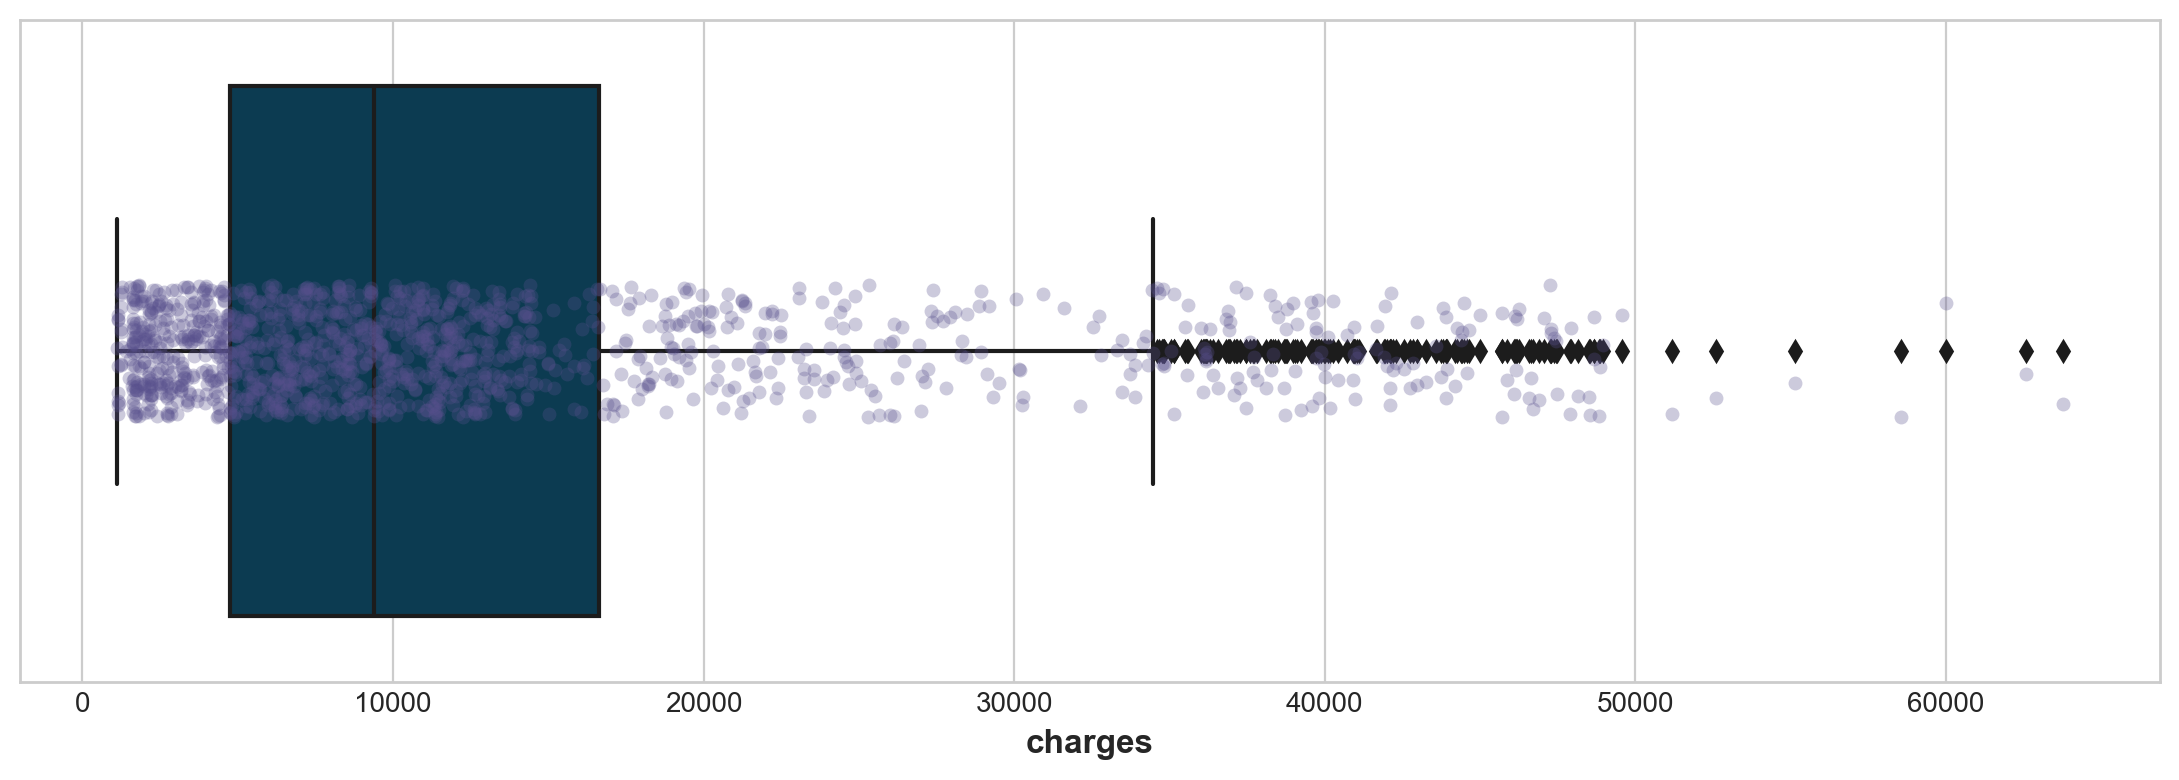

In [36]:
# Create a a boxplot of the charges column
sns.boxplot(x='charges', data=df, color="#003f5c")
sns.stripplot(x='charges', data=df, color="#58508d", alpha=0.3)

With regard to the position column, it can be seen that the data is skewed to the right. A right-skewed histogram means that the data is skewed towards the right or has a long right tail. In other words, the majority of the data is clustered towards the left, and there are fewer data points towards the right. Likewise, in the second graph we can see extreme values (outliers) which can affect the accuracy of the machine learning models.

## **Can we predict the insurance costs?**

**Task 1: Use the data in the relevant columns to determine how age affects insurance costs:**

* Plot a scatter plot with age on the x-axis and charges on the y-axis

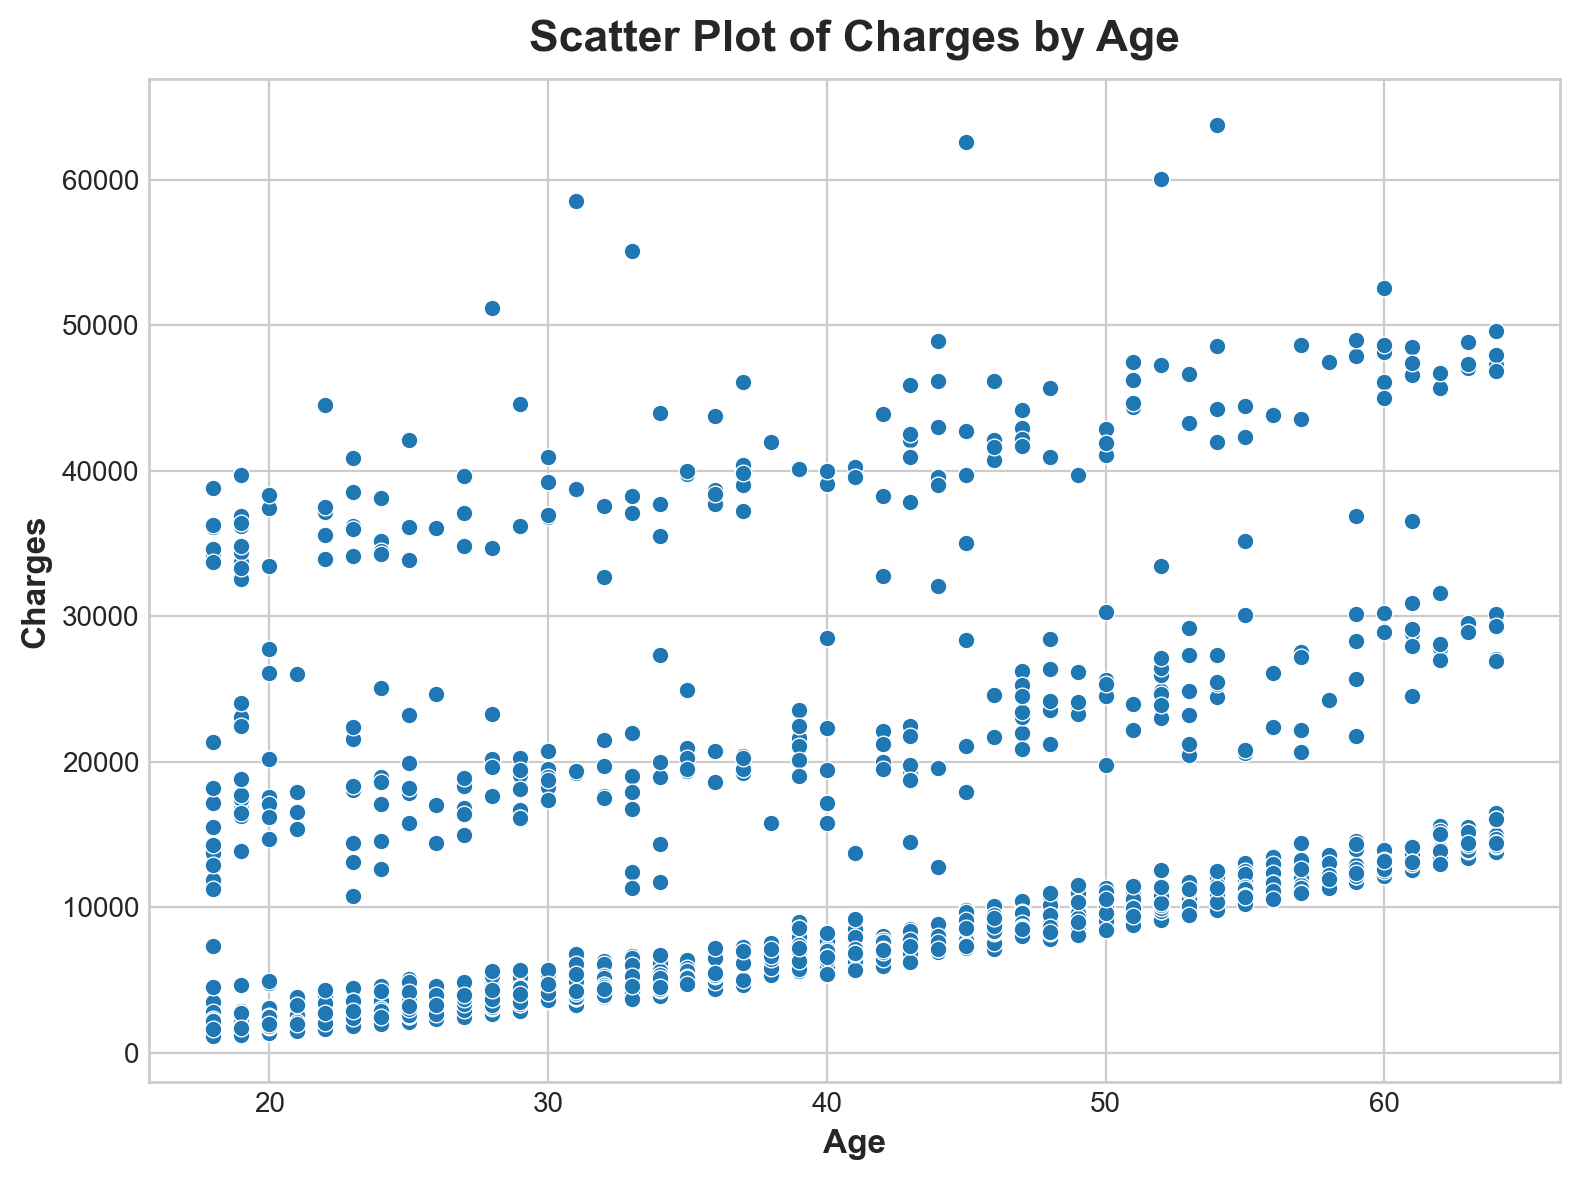

In [101]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot of charges by age using Seaborn
sns.scatterplot(x='age', y='charges', data=df)

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Scatter Plot of Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')

# Display the plot
plt.show()

* Using linear_model.LinearRegression() from sklearn, fit a model to your data, and make predictions on data.


In [102]:
# Setting the input and output variables
X = df['age'].values.reshape(-1, 1) # input, reshaped to be 2Dimensional array
y = df['charges'].values # output

In [103]:
# Create an instance of the linear regression model
model = LinearRegression()

In [104]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [105]:
# Make predictions using the model
y_pred = model.predict(X)

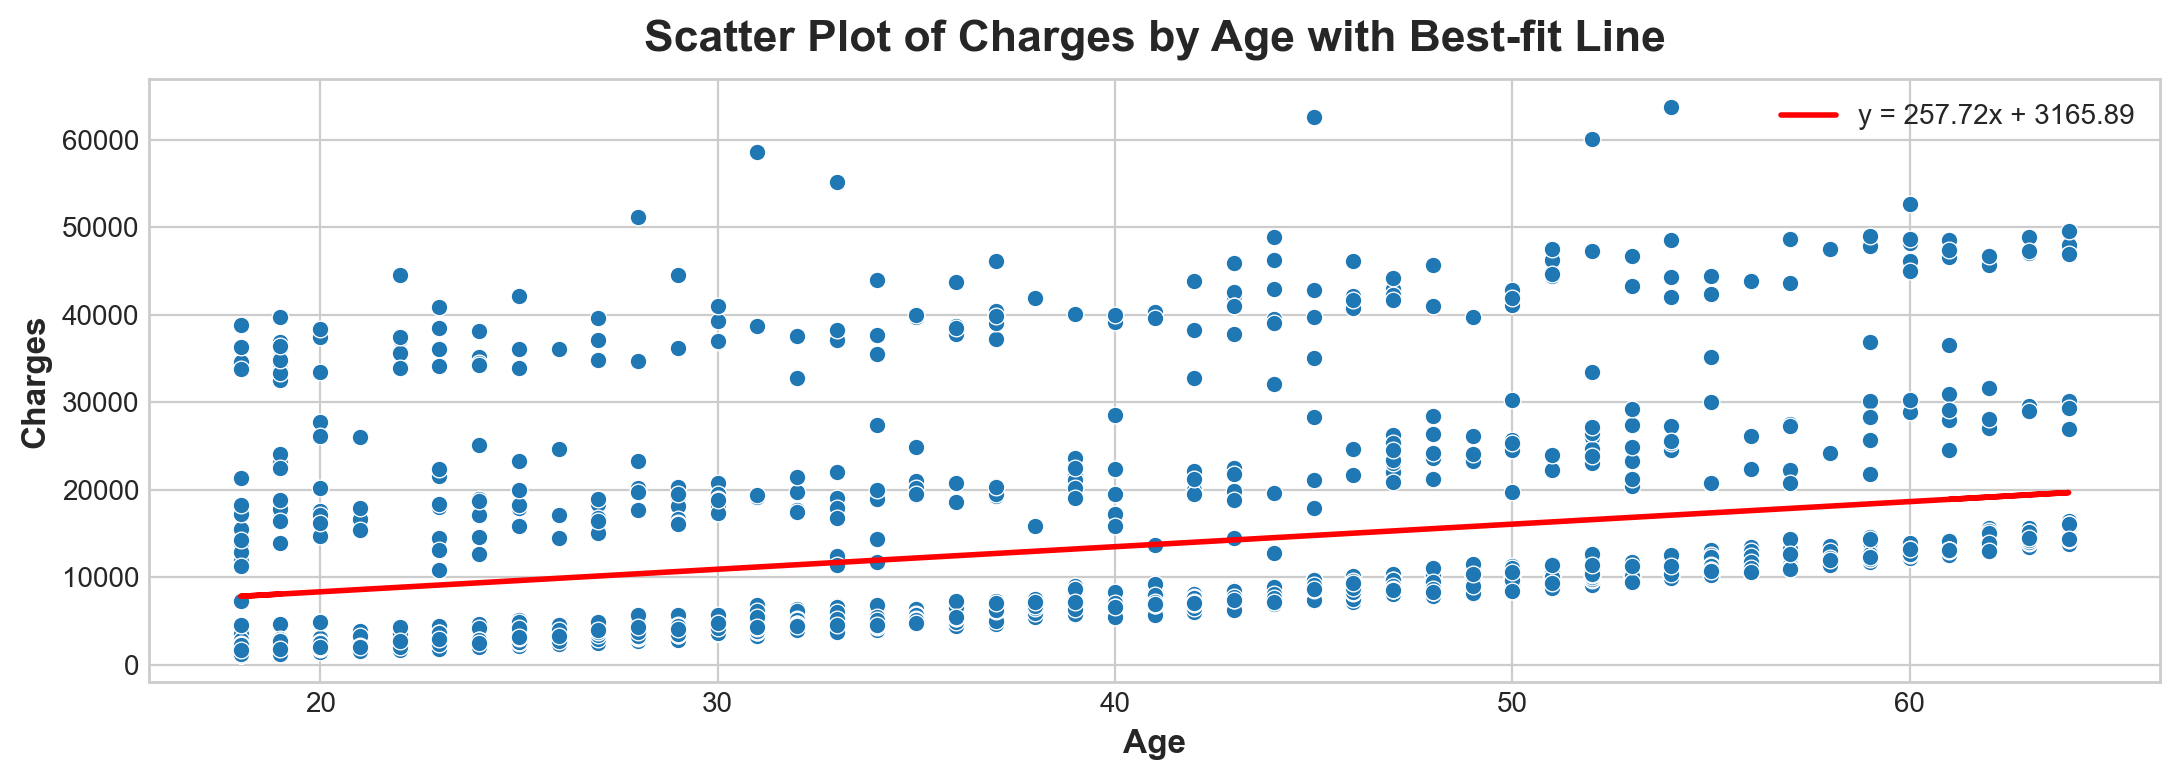

In [106]:
# Get the slope and intercept of the best-fit line
slope = model.coef_[0]
intercept = model.intercept_


# Create a scatter plot of charges by age, with best-fit line
sns.scatterplot(x='age', y='charges', data=df)
plt.plot(X, y_pred, color='red', linewidth=2, label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.title('Scatter Plot of Charges by Age with Best-fit Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [108]:
# Check the accuracy of the model:

from sklearn.metrics import mean_squared_error, r2_score
# Calculate mean squared error
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)

# Calculate R-squared
r2 = r2_score(y, y_pred)
print('R-squared:', r2)

Mean Squared Error: 133440978.61376347
R-squared: 0.08940589967885804


The Mean Squared Error (MSE) is a measure of the average squared difference between the predicted values and the actual values. In this case, the MSE value of 133440978.61376347 indicates that the model's predictions are, on average, off by a significant amount.

The R-squared value, on the other hand, is a statistical measure that indicates the proportion of the variance in the dependent variable that is explained by the independent variables in the model. An R-squared value of 0.08940589967885804 suggests that only 8.9% of the variability in the dependent variable can be explained by the independent variables in the model.

Overall, these results indicate that the model is not performing well and needs improvement. A higher R-squared value and a lower MSE value are generally desirable, as they indicate better accuracy and a stronger relationship between the dependent and independent variables.

## **Predicting the Insurance cost using categorical variables**

In [89]:
# Additional Libraries for Machine Learning
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [90]:
# Separate the input and output variables
X = df.drop('charges', axis=1)
y = df['charges']

In [91]:
# Encoding the categorical variables using one-hot encoding
cat_cols = ['sex', 'smoker', 'region']
ct = ColumnTransformer([('ohe', OneHotEncoder(), cat_cols)], remainder='passthrough')

In [92]:
# Define the pipeline with column transformer and linear regression model
pipe = Pipeline([
    ('ct', ct),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [94]:
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [95]:
# Make predictions on the testing data
y_pred = pipe.predict(X_test)

In [96]:
# Evaluate the performance of the model using R2 and RMSE metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.7558828801717257
RMSE: 5669.575337893409


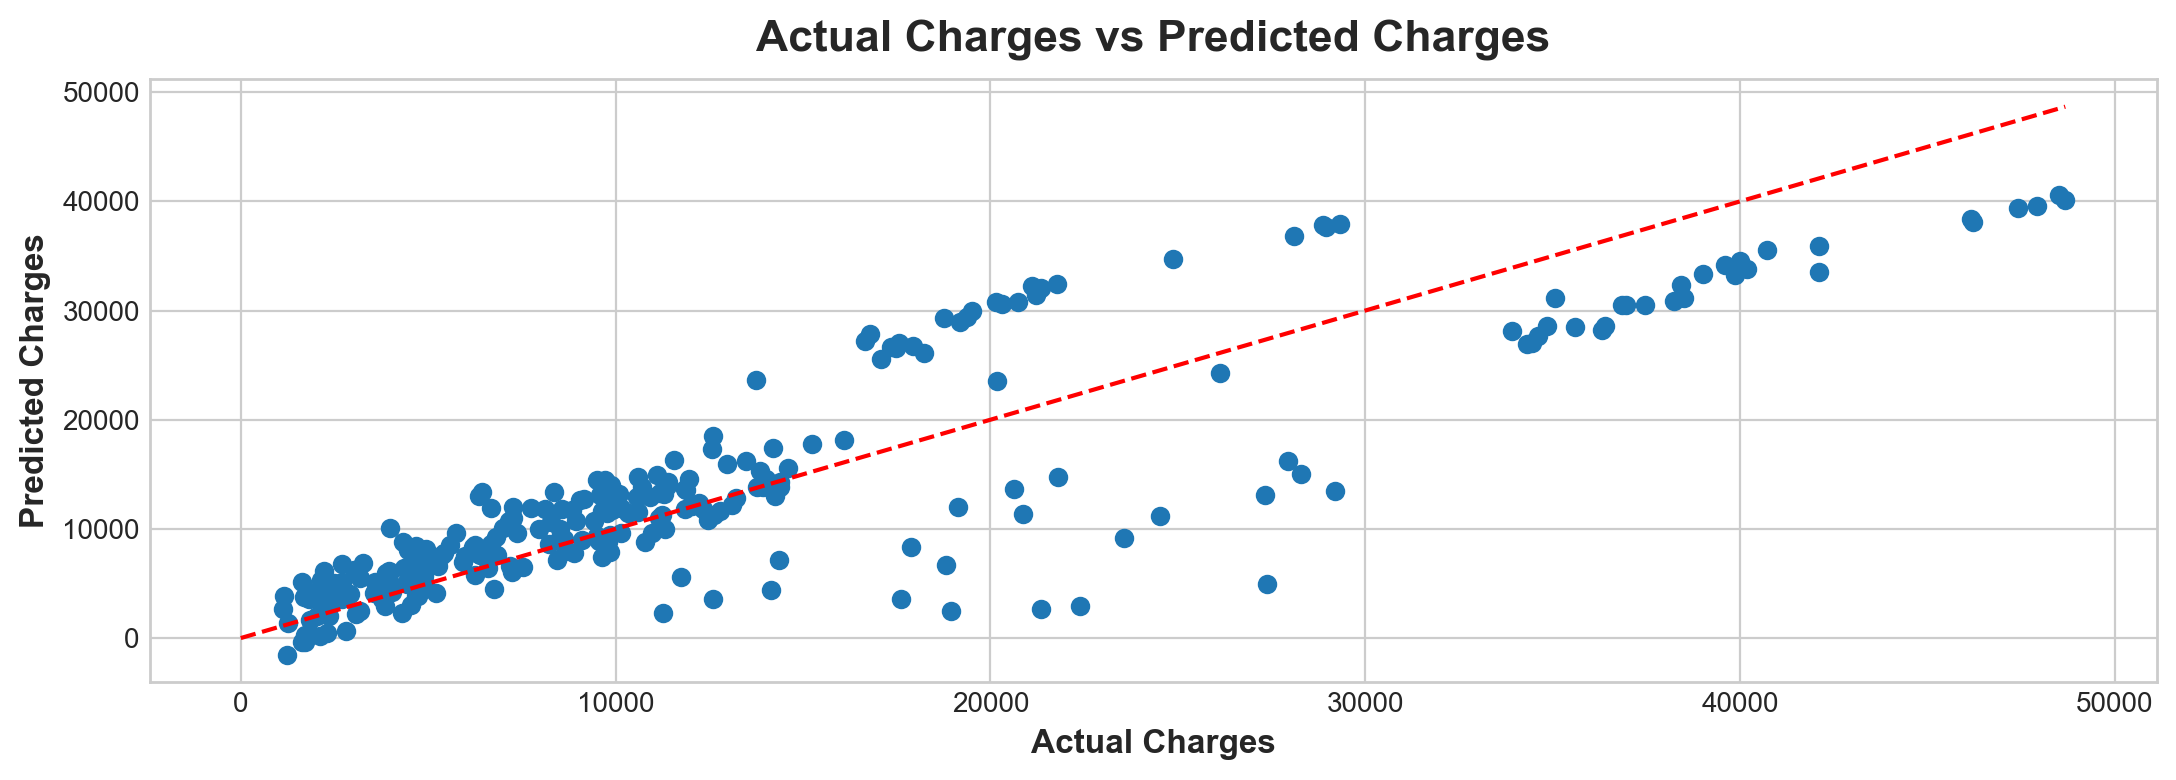

In [98]:
# Create a scatter plot of actual charges vs predicted charges
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')

# Add a diagonal line for reference
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--')

# Show the plot
plt.show()

## **Conclusion**

Based on the results obtained, the linear regression model with one-hot encoding and standard scaling has a moderate level of predictive power with an R2 score of 0.76, indicating that approximately 76% of the variance in the target variable can be explained by the model.

The RMSE value of 5669 suggests that the model has an average error of approximately $5,669 in predicting the medical charges of an individual.

Overall, the model appears to perform reasonably well, but there may be some room for improvement. It would be useful to explore other machine learning models, as well as feature engineering and selection techniques, to see if a better-performing model can be developed. Additionally, it would be valuable to investigate the importance of individual features in predicting medical charges, as this information could be used to help guide decision-making and resource allocation in the healthcare industry.